## Intersection of Polygons
---
### Xiaomeng

In [1]:
%matplotlib inline
from __future__ import print_function, division
import geopandas as gpd
import os
from matplotlib.pylab import plt
from fiona.crs import from_epsg

### 1. Reading the datasets of different boundaries.

In [2]:
# PUMA

filepath = '/Users/DXM/Documents/ARGO/ops'
puma = gpd.read_file(filepath + '/cb_2016_06_puma10_500k/cb_2016_06_puma10_500k.shp')
puma = puma.to_crs(epsg=4269)
pu = gpd.GeoDataFrame(puma)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Public Use Microdata Areas')

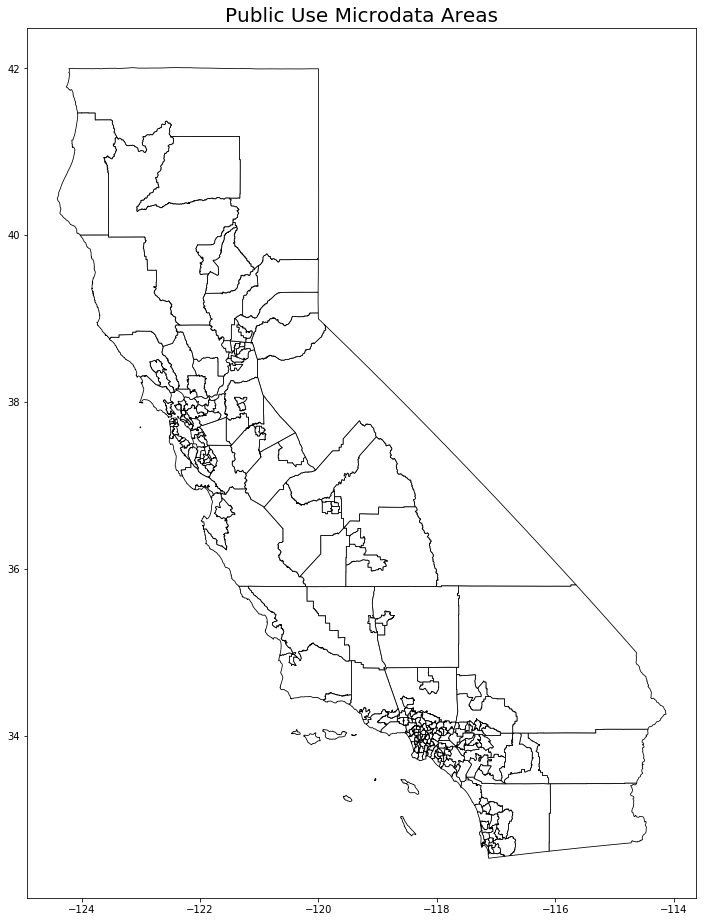

In [3]:
fig, ax = plt.subplots(figsize=(12,16))
pu.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Public Use Microdata Areas', fontsize=20)

In [4]:
# LACITY_COMMUNITIES

community = gpd.read_file(filepath + '/LACITY_COMMUNITIES/LACITY_COMMUNITIES.shp')
community = community.to_crs(epsg=4269)
co = gpd.GeoDataFrame(community)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Community Boundaries of LA City')

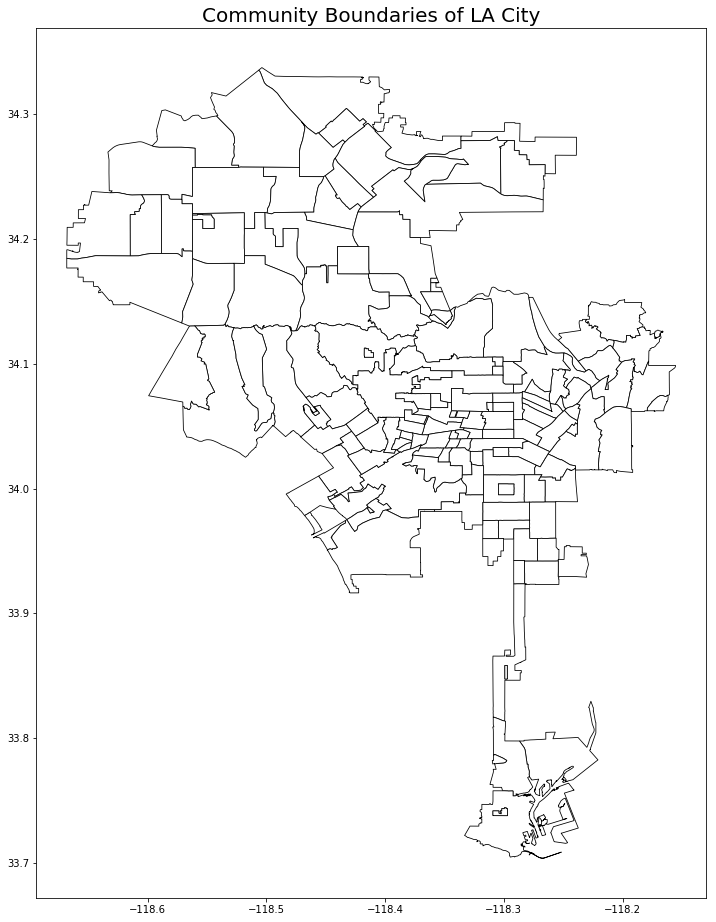

In [5]:
fig, ax = plt.subplots(figsize=(12,16))
co.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Community Boundaries of LA City', fontsize=20)

In [6]:
#LACITY_NEIGHBORHOOD_COUNCILS

council = gpd.read_file(filepath + '/LACITY_NEIGHBORHOOD_COUNCILS/LACITY_NEIGHBORHOOD_COUNCILS.shp')
council = council.to_crs(epsg=4269)
cl = gpd.GeoDataFrame(council) 

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Neighborhood Council Boundaries of LA City')

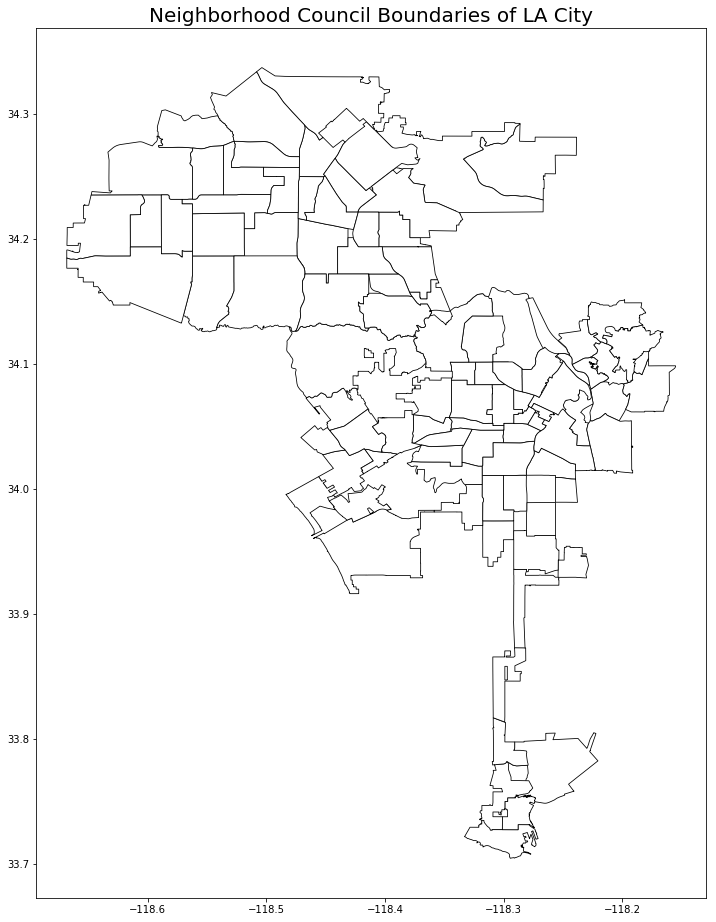

In [7]:
fig, ax = plt.subplots(figsize=(12,16))
cl.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Neighborhood Council Boundaries of LA City', fontsize=20)

In [8]:
# FIRE_DIVISION_BOUNDARIES

fire_division = gpd.read_file(filepath + '/FIRE_DIVISION_BOUNDARIES/FIRE_DIVISION_BOUNDARIES.shp')
fire_division= fire_division.to_crs(epsg=4269)
fr_di = gpd.GeoDataFrame(fire_division)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Fire Division Boundaries of LA C')

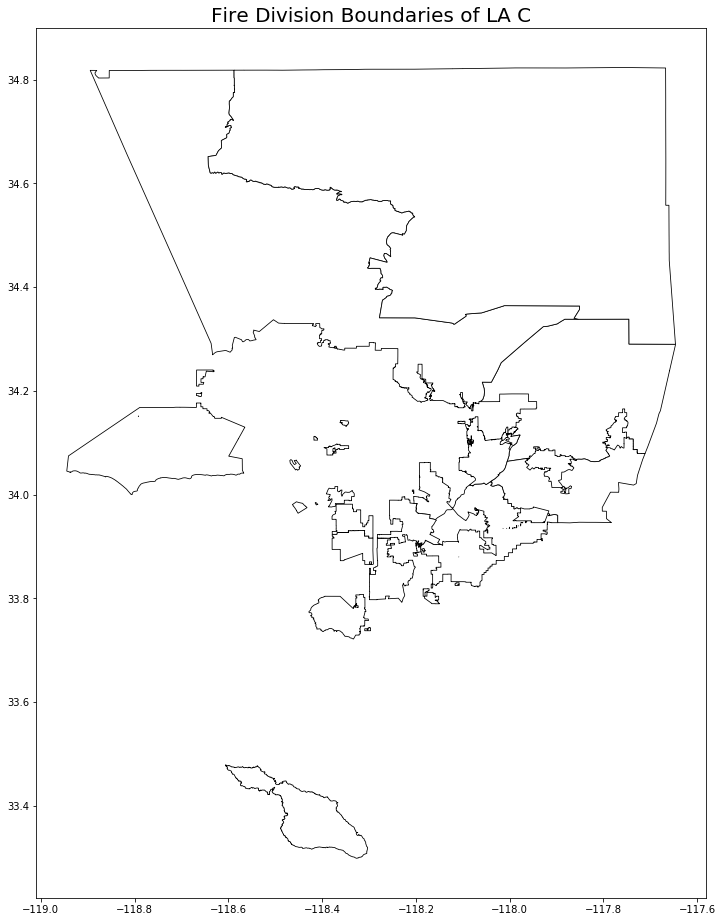

In [9]:
fig, ax = plt.subplots(figsize=(12,16))
fr_di.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Fire Division Boundaries of LA C', fontsize=20)

In [10]:
# FIRE_BATTALION_BOUNDARIES

fire_battalion = gpd.read_file(filepath + '/FIRE_BATTALION_BOUNDARIES/FIRE_BATTALION_BOUNDARIES.shp')
fire_battalion = fire_battalion.to_crs(epsg=4269)
fr_ba = gpd.GeoDataFrame(fire_battalion)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Fire Battalion Boundaries of LA County')

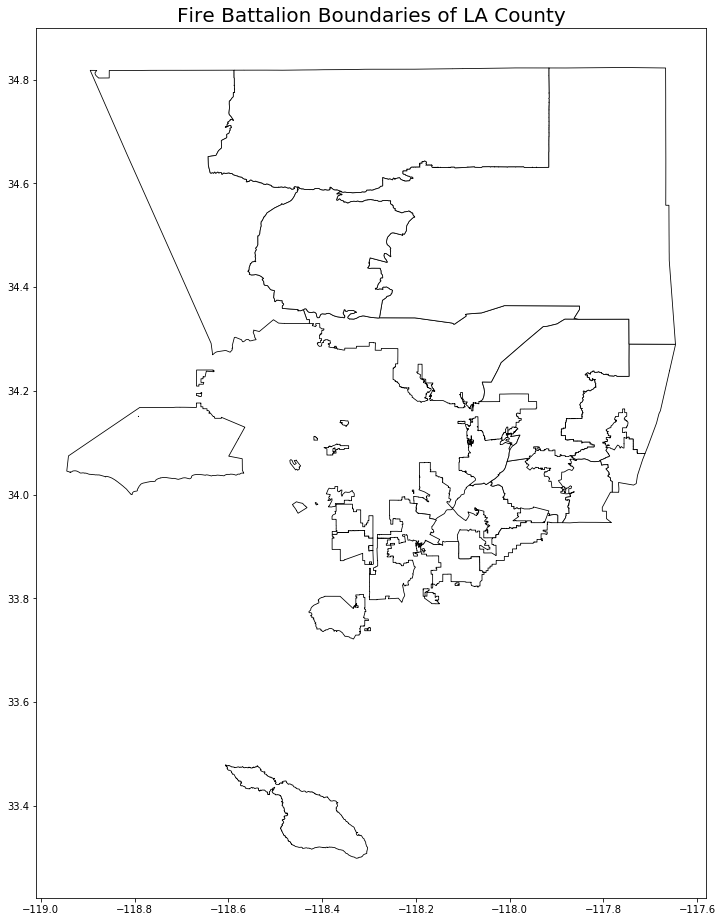

In [11]:
fig, ax = plt.subplots(figsize=(12,16))
fr_ba.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Fire Battalion Boundaries of LA County', fontsize=20)

### 2. Interceptions of Polygons

In [14]:
from spatial_overlays import spatial_overlays

In [15]:
pu_co = spatial_overlays(pu, co, how='intersection', reproject=True)

In [16]:
pu_co_cl = spatial_overlays(pu_co, cl, how='intersection', reproject=True)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Intersection Boundaries of LA County')

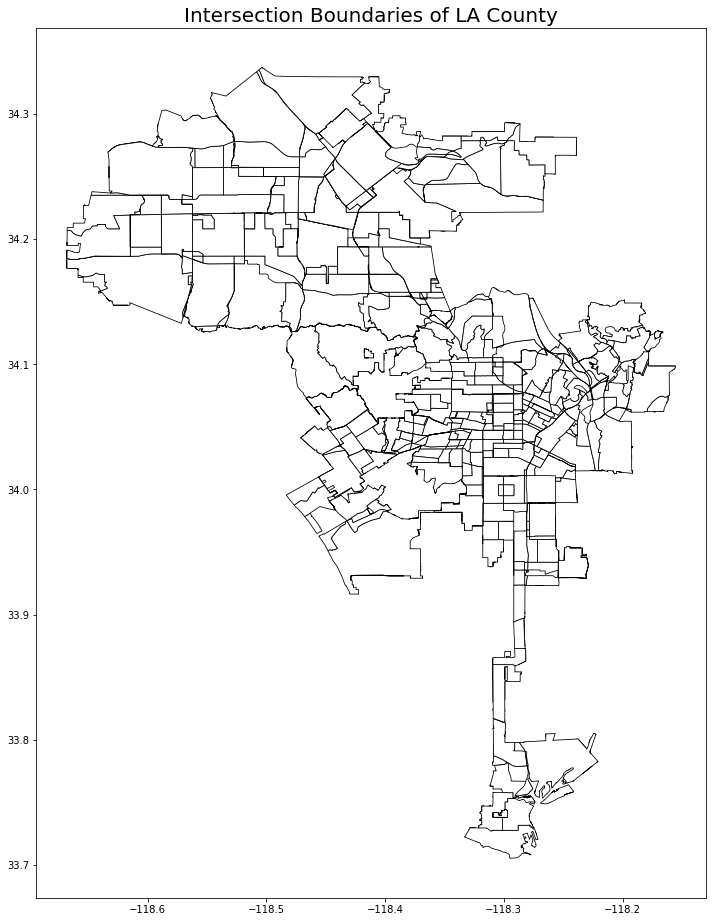

In [17]:
fig, ax = plt.subplots(figsize=(12,16))
pu_co_cl.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Intersection Boundaries of LA County', fontsize=20)

In [18]:
fr = spatial_overlays(fr_di, fr_ba, how='intersection', reproject=True)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Intersection Fire Boundaries of LA County')

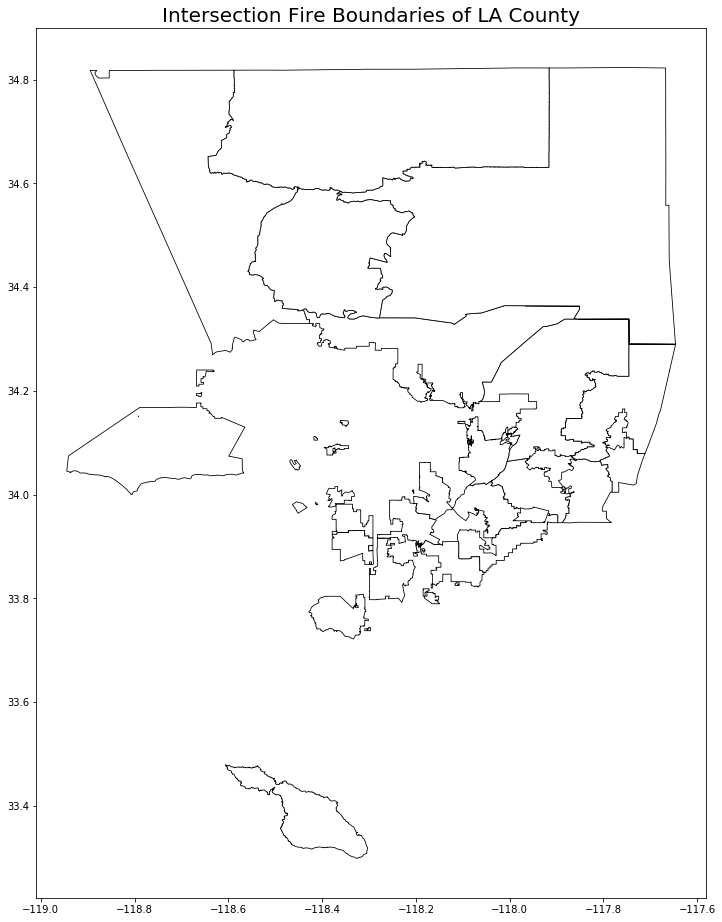

In [19]:
fig, ax = plt.subplots(figsize=(12,16))
fr.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Intersection Fire Boundaries of LA County', fontsize=20)

In [20]:
intersection = spatial_overlays(pu_co_cl, fr, how='intersection', reproject=True)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Intersection Boundaries of LA County')

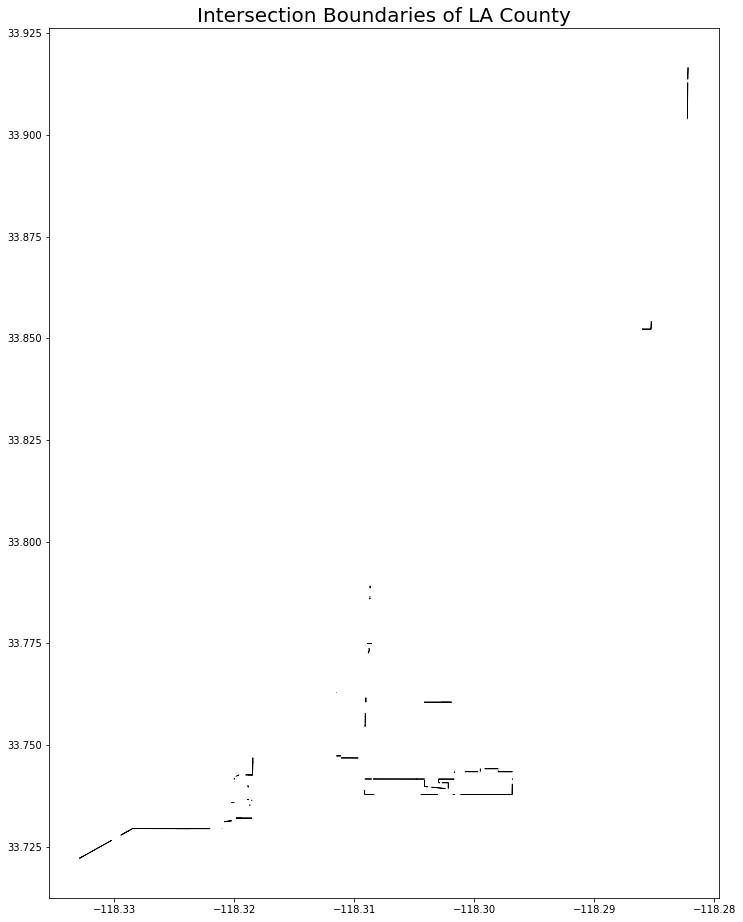

In [21]:
fig, ax = plt.subplots(figsize=(12,16))
intersection.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Intersection Boundaries of LA County', fontsize=20)

In [22]:
intersection

,STATEFP10,PUMACE10,AFFGEOID10,GEOID10,NAME10,LSAD10,ALAND10,AWATER10,COMTY_NAME,CERT,...,DIV,Shape_Leng_1,Shape_STAr_1_2,Shape_STLe_1_2,OBJECTID_2,BATTID,Shape_Leng_2,Shape_STAr_2_2,Shape_STLe_2_2,geometry
0,06,03768,7950000US0603768,0603768,Los Angeles County (Southwest)--Palos Verdes P...,P0,418109854,1259775810,SAN PEDRO,yes,...,I,833432.636325,4.066853e+09,833432.636325,14,14,520920.860985,2.860586e+09,520920.860985,(POLYGON ((-118.3193816296287 33.7319889751461...
1,06,03767,7950000US0603767,0603767,Los Angeles County (South)--LA City (South/San...,P0,66961251,20615812,SAN PEDRO,yes,...,I,833432.636325,4.066853e+09,833432.636325,14,14,520920.860985,2.860586e+09,520920.860985,(POLYGON ((-118.3198246269474 33.7319828506896...
2,06,03768,7950000US0603768,0603768,Los Angeles County (Southwest)--Palos Verdes P...,P0,418109854,1259775810,SAN PEDRO,yes,...,I,833432.636325,4.066853e+09,833432.636325,14,14,520920.860985,2.860586e+09,520920.860985,(POLYGON ((-118.3090870536274 33.7577147770254...
3,06,03767,7950000US0603767,0603767,Los Angeles County (South)--LA City (South/San...,P0,66961251,20615812,SAN PEDRO,yes,...,I,833432.636325,4.066853e+09,833432.636325,14,14,520920.860985,2.860586e+09,520920.860985,(POLYGON ((-118.2989112901621 33.7441438645576...
4,06,03767,7950000US0603767,0603767,Los Angeles County (South)--LA City (South/San...,P0,66961251,20615812,,,...,I,833432.636325,4.066853e+09,833432.636325,14,14,520920.860985,2.860586e+09,520920.860985,(POLYGON ((-118.2995038426006 33.7441409770500...
6,06,03768,7950000US0603768,0603768,Los Angeles County (Southwest)--Palos Verdes P...,P0,418109854,1259775810,HARBOR CITY,yes,...,I,833432.636325,4.066853e+09,833432.636325,14,14,520920.860985,2.860586e+09,520920.860985,(POLYGON ((-118.3027608484819 33.7605114319161...
7,06,03767,7950000US0603767,0603767,Los Angeles County (South)--LA City (South/San...,P0,66961251,20615812,HARBOR CITY,yes,...,I,833432.636325,4.066853e+09,833432.636325,14,14,520920.860985,2.860586e+09,520920.860985,(POLYGON ((-118.3020009838207 33.7605109549049...
8,06,03767,7950000US0603767,0603767,Los Angeles County (South)--LA City (South/San...,P0,66961251,20615812,SAN PEDRO,yes,...,I,833432.636325,4.066853e+09,833432.636325,14,14,520920.860985,2.860586e+09,520920.860985,(POLYGON ((-118.2968282576761 33.7433996334846...
9,06,03767,7950000US0603767,0603767,Los Angeles County (South)--LA City (South/San...,P0,66961251,20615812,,,...,I,833432.636325,4.066853e+09,833432.636325,14,14,520920.860985,2.860586e+09,520920.860985,(POLYGON ((-118.2968791287156 33.7377964479990...
17,06,03768,7950000US0603768,0603768,Los Angeles County (Southwest)--Palos Verdes P...,P0,418109854,1259775810,HARBOR CITY,yes,...,I,833432.636325,4.066853e+09,833432.636325,14,14,520920.860985,2.860586e+09,520920.860985,(POLYGON ((-118.3086896000847 33.7885549594818...
